In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_columns', None)

In [7]:
!unzip '/content/drive/MyDrive/new-york-city-taxi-fare-prediction (1).zip'

Archive:  /content/drive/MyDrive/new-york-city-taxi-fare-prediction (1).zip
  inflating: GCP-Coupons-Instructions.rtf  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
%%time
sub_df= pd.read_csv('//content/sample_submission.csv')
test_df= pd.read_csv('/content/test.csv')
df= pd.read_csv('/content/train.csv')
df.sample(5)

CPU times: user 1min 37s, sys: 12.9 s, total: 1min 50s
Wall time: 1min 50s


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
29679763,2011-04-19 09:18:03.0000001,6.1,2011-04-19 09:18:03 UTC,-73.988710,40.763929,-73.975512,40.757759,1
47007762,2013-01-29 18:39:16.0000001,16.0,2013-01-29 18:39:16 UTC,-74.005731,40.736678,-73.961345,40.756609,1
52062989,2012-02-11 14:52:00.000000144,12.9,2012-02-11 14:52:00 UTC,-73.958217,40.775537,-74.000665,40.746180,1
16146689,2012-02-05 21:56:14.0000002,8.5,2012-02-05 21:56:14 UTC,-73.982482,40.764175,-73.950388,40.775646,2
10675478,2012-06-21 22:24:00.000000180,7.3,2012-06-21 22:24:00 UTC,-73.976747,40.728872,-73.999810,40.738707,2


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '../input/new-york-city-taxi-fare-prediction'
!ls -lh {data_dir}

ls: cannot access '../input/new-york-city-taxi-fare-prediction': No such file or directory


In [9]:
df_test = pd.read_csv('/content/test.csv',parse_dates=['pickup_datetime'])
df_test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float64            
 3   pickup_latitude    9914 non-null   float64            
 4   dropoff_longitude  9914 non-null   float64            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 542.3+ KB


`Why key is an object data type to me this these number in the dataframe?`

In [ ]:
df_test.key.nunique()

9914

### Now lets load training data
I will avoid key column

In [10]:
import random

In [11]:
sample_frac = 0.20

In [12]:
%%time
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float16',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'uint8'
}
def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac  ##

random.seed(7)
df = pd.read_csv("/content/train.csv",
                 usecols=selected_cols,
                 dtype=dtypes,
                 parse_dates=['pickup_datetime'],
                 skiprows=skip_row)
df_original =df.copy()
df

/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/c_parser_wrapper.py:234: RuntimeWarning: overflow encountered in cast
  chunks = self._reader.read_low_memory(nrows)


CPU times: user 3min 47s, sys: 4.12 s, total: 3min 51s
Wall time: 3min 50s


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,16.906250,2010-01-05 16:52:16+00:00,-74.016045,40.711304,-73.979271,40.782004,1
1,7.699219,2012-04-21 04:30:42+00:00,-73.987129,40.733143,-73.991570,40.758092,1
2,7.500000,2012-11-20 20:35:00+00:00,-73.980003,40.751663,-73.973801,40.764842,1
3,9.000000,2012-12-03 13:10:00+00:00,-74.006462,40.726711,-73.993080,40.731628,1
4,5.300781,2012-04-08 07:30:50+00:00,-73.996338,40.737141,-73.980721,40.733559,1
...,...,...,...,...,...,...,...
11079469,18.000000,2015-06-13 20:45:19+00:00,-73.987335,40.755325,-74.015221,40.710213,2
11079470,5.300781,2009-06-03 20:16:35+00:00,-73.976189,40.748318,-73.979683,40.757659,1
11079471,14.000000,2014-03-15 03:28:00+00:00,-74.005272,40.740028,-73.963280,40.762555,1
11079472,14.101562,2011-04-02 22:04:24+00:00,-73.970505,40.752323,-73.960541,40.797342,1


In [13]:

df.to_csv('20% ofnew-york-city-taxi-fare-predicition.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11079474 entries, 0 to 11079473
Data columns (total 7 columns):
 #   Column             Dtype              
---  ------             -----              
 0   fare_amount        float16            
 1   pickup_datetime    datetime64[ns, UTC]
 2   pickup_longitude   float32            
 3   pickup_latitude    float32            
 4   dropoff_longitude  float32            
 5   dropoff_latitude   float64            
 6   passenger_count    uint8              
dtypes: datetime64[ns, UTC](1), float16(1), float32(3), float64(1), uint8(1)
memory usage: 327.6 MB


In [14]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,67
dropoff_latitude,67
passenger_count,0


Dataset has no missing values

In [15]:
%%time
df.duplicated().sum()

CPU times: user 7.88 s, sys: 4.45 ms, total: 7.89 s
Wall time: 7.86 s


69

In [16]:
%%time
df.drop_duplicates()
df.duplicated().sum()

CPU times: user 16.6 s, sys: 14.1 ms, total: 16.6 s
Wall time: 16.5 s


69

In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,11079474.0,1.107947e+07,1.107947e+07,1.107941e+07,1.107941e+07,1.107947e+07
mean,NaN,-7.251492e+01,3.992204e+01,-7.251260e+01,3.992268e+01,1.685385e+00
std,NaN,1.311850e+01,9.569191e+00,1.305558e+01,9.804019e+00,1.324043e+00
min,-176.0,-3.440697e+03,-3.492264e+03,-3.440697e+03,-3.481141e+03,0.000000e+00
25%,6.0,-7.399207e+01,4.073494e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.5,-7.398180e+01,4.075265e+01,-7.398016e+01,4.075314e+01,1.000000e+00
75%,12.5,-7.396709e+01,4.076714e+01,-7.396368e+01,4.076809e+01,2.000000e+00
max,inf,3.456213e+03,3.378013e+03,3.453425e+03,3.537133e+03,2.080000e+02


In [17]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [18]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [19]:
%%time
add_trip_distance(df)

CPU times: user 1.78 s, sys: 6.2 ms, total: 1.79 s
Wall time: 574 ms


In [20]:
def add_dateparts(df, col):
    df['year'] = df[col].dt.year
    df['month'] = df[col].dt.month
    df['day'] = df[col].dt.day
    df['weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [21]:
%%time
add_dateparts(df, 'pickup_datetime')

CPU times: user 2.45 s, sys: 0 ns, total: 2.45 s
Wall time: 2.44 s


In [22]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [23]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [24]:
%%time
for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
    add_landmark_dropoff_distance(df, name, lonlat)

CPU times: user 8.19 s, sys: 16.3 ms, total: 8.2 s
Wall time: 2.59 s


In [25]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [26]:
%%time
df = remove_outliers(df)

CPU times: user 1.22 s, sys: 1.61 ms, total: 1.23 s
Wall time: 980 ms


In [27]:
df[df['fare_amount']<0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance


In [28]:
df[df['fare_amount']>500]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance


In [29]:
df[df['pickup_longitude']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance


In [30]:
df[df['trip_distance']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance


In [31]:
df[df['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance


In [32]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:01:04+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:48+0000', tz='UTC'))

In [33]:
%%time
df = df.drop('pickup_datetime', axis=1)
df.head(2)

CPU times: user 461 ms, sys: 60.1 ms, total: 522 ms
Wall time: 517 ms


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,16.906250,-74.016045,40.711304,-73.979271,40.782004,1,8.444430,2010,1,5,1,16,23.056634,8.876137,19.388403,1.382661,8.132255
1,7.699219,-73.987129,40.733143,-73.991570,40.758092,1,2.797752,2012,4,21,5,4,22.178350,10.113211,17.188500,3.362615,5.285693


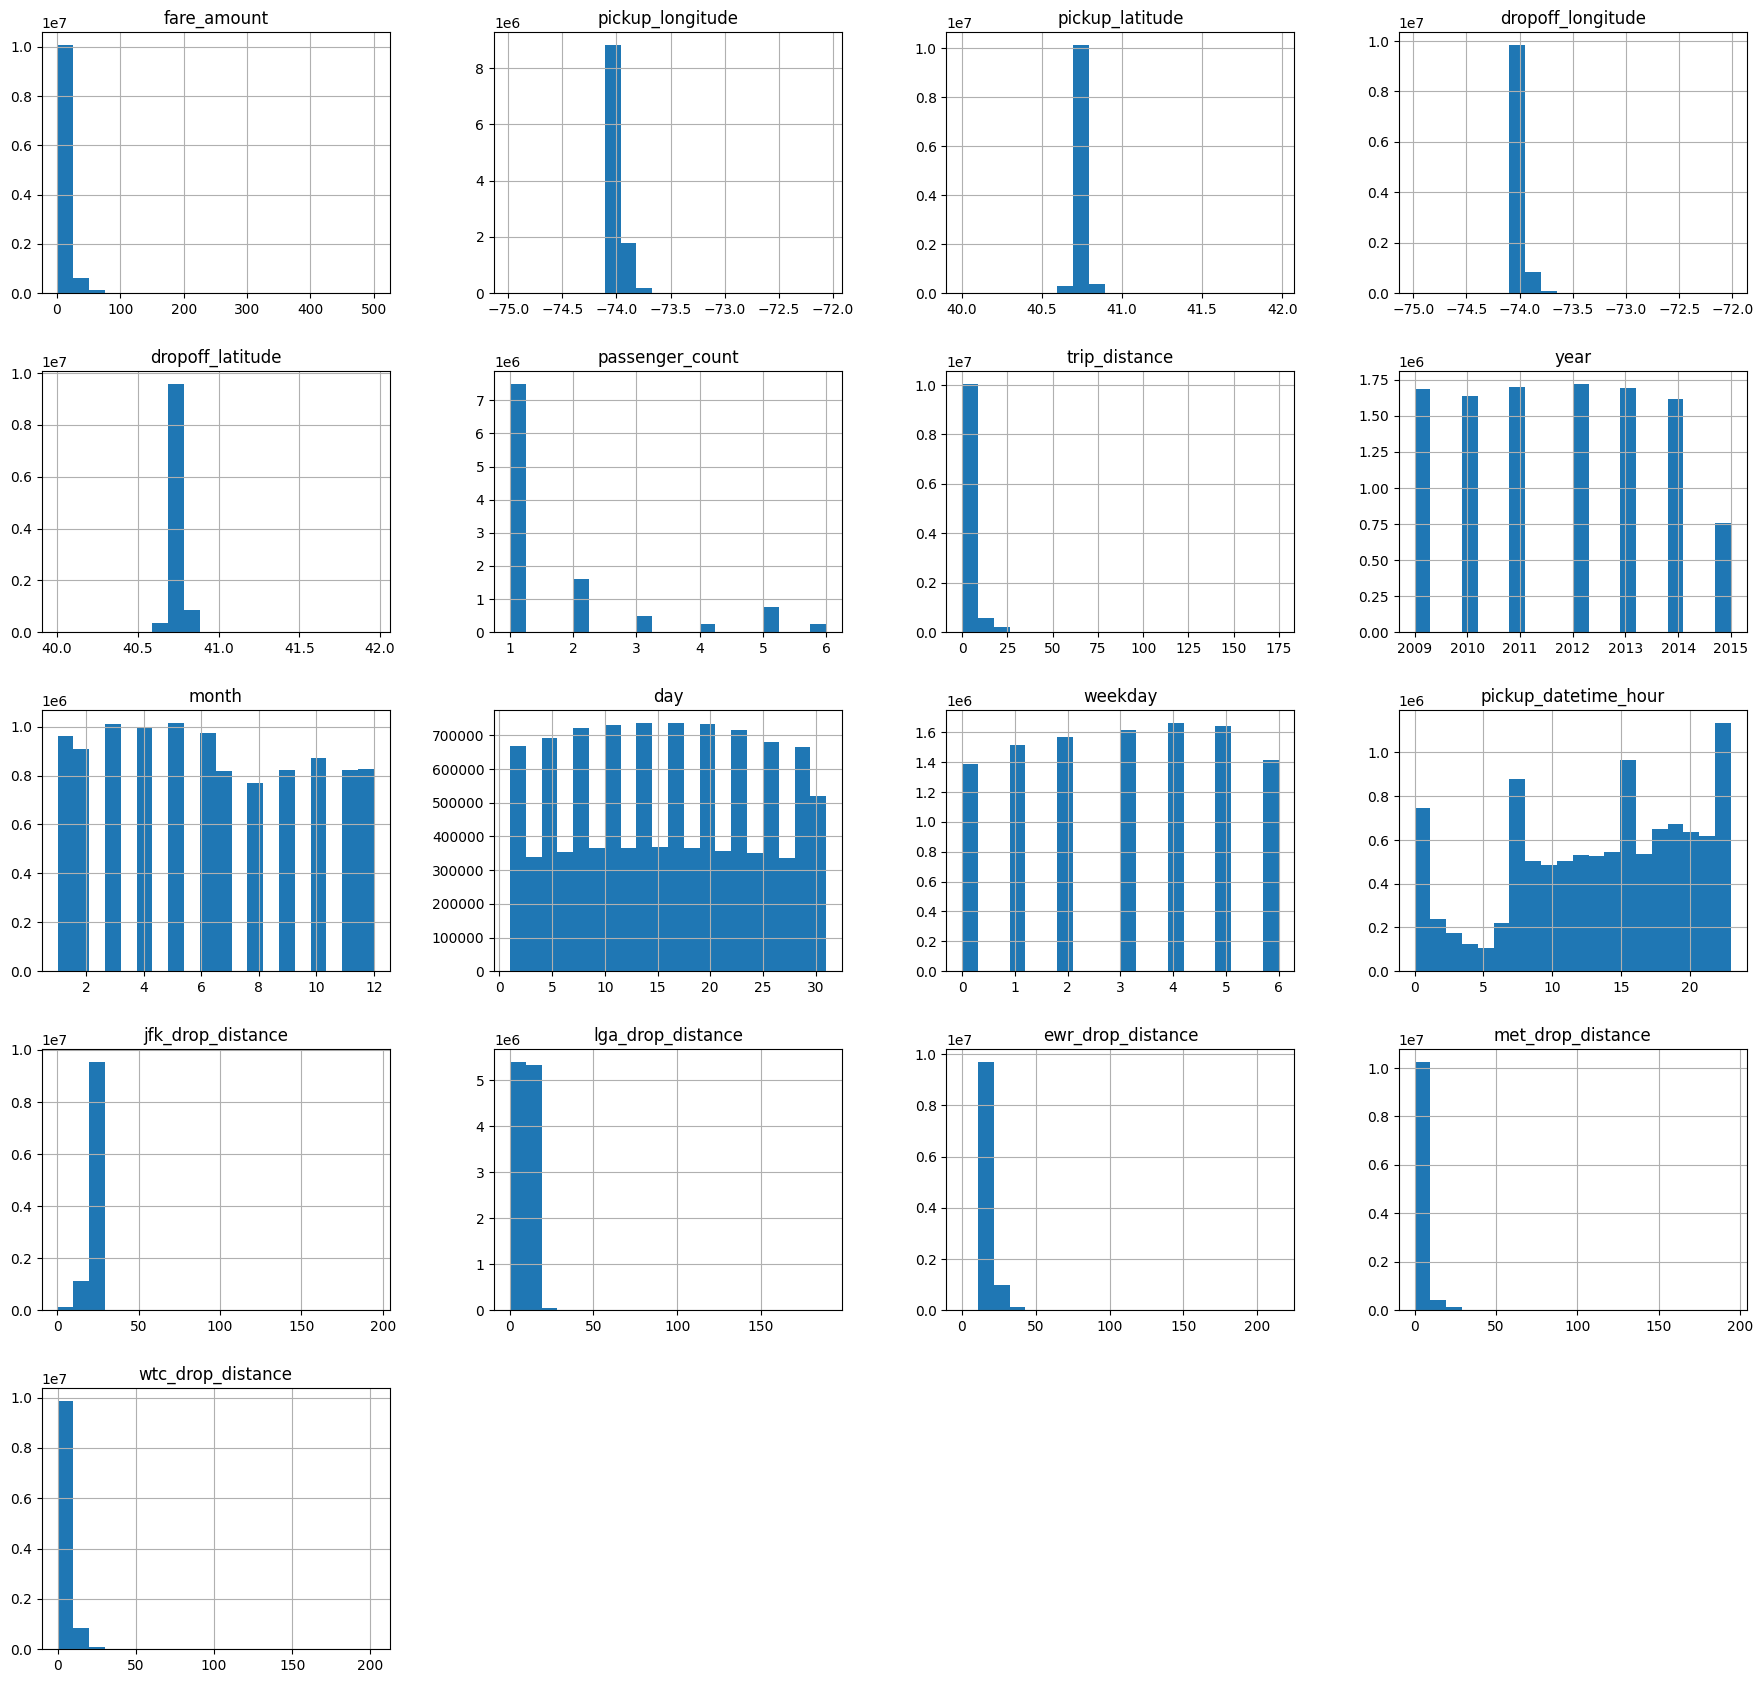

In [34]:
df.hist(figsize=(22,21), bins=20);

In [35]:
df.weekday.mode()

,weekday
0,4


In [36]:
df.pickup_datetime_hour.mode()

,pickup_datetime_hour
0,19


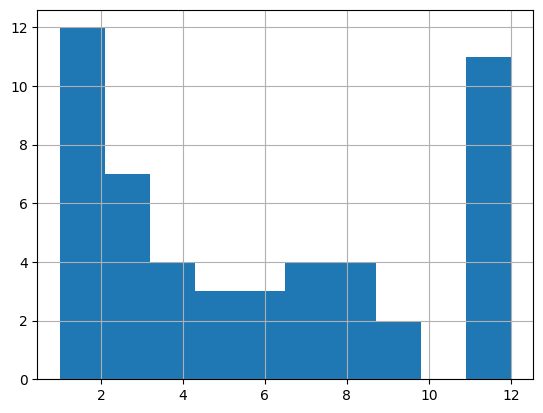

In [37]:
df_fare= df.sort_values(ascending=False, by= 'fare_amount').head(50)
df_fare.month.hist();

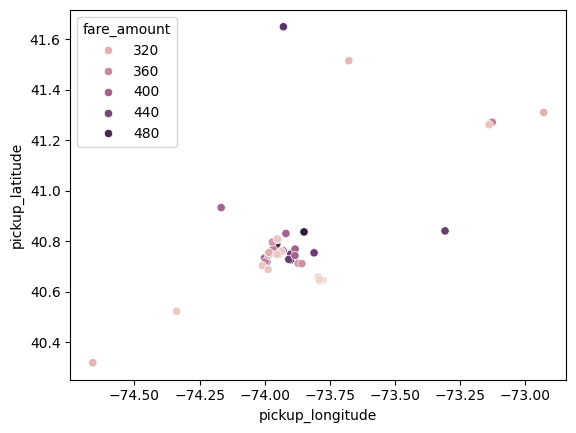

In [38]:
sns.scatterplot(x='pickup_longitude', y= 'pickup_latitude', hue='fare_amount',data=df_fare);

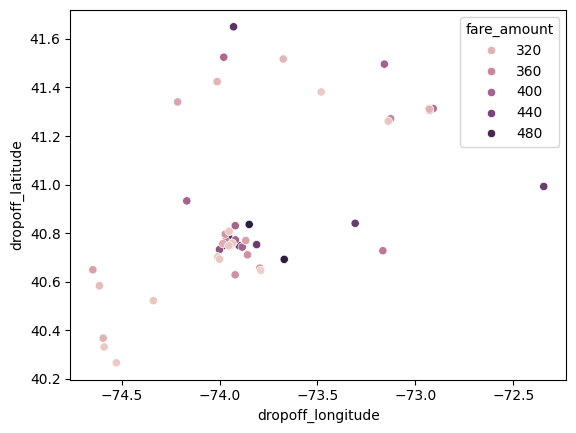

In [39]:
sns.scatterplot(x='dropoff_longitude', y= 'dropoff_latitude',hue='fare_amount',data=df_fare);

In [40]:
df.trip_distance.mean()

3.3286306900324125

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

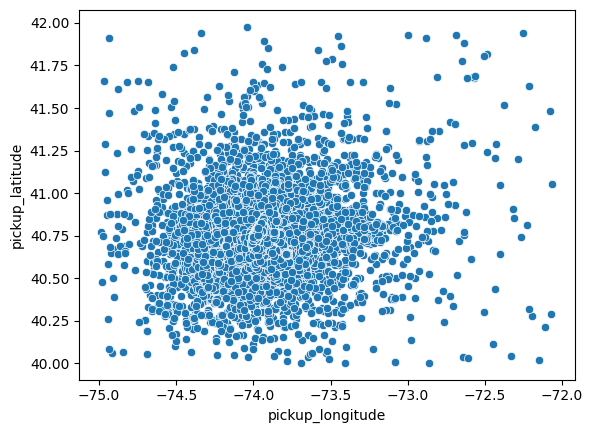

In [41]:
sns.scatterplot(x='pickup_longitude', y= 'pickup_latitude', data=df )

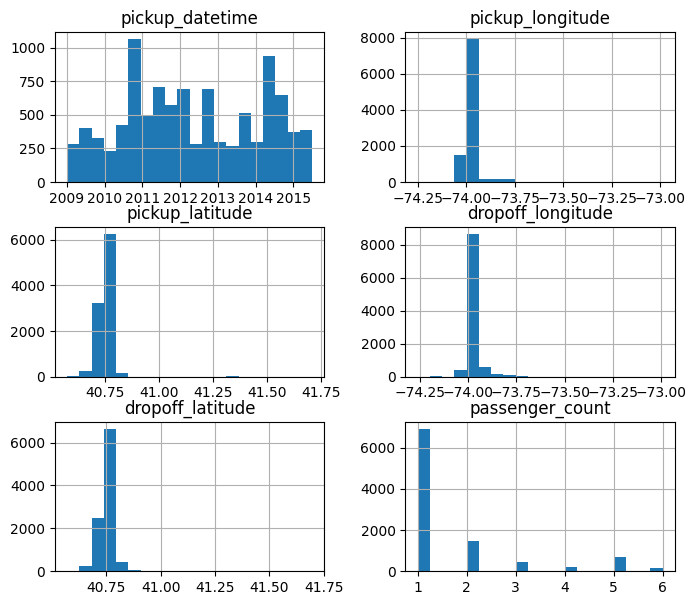

In [42]:
df_test.hist(figsize=(8,7), bins=20);

In [43]:
df_test[df_test['pickup_longitude']==0]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [44]:
df_test[df_test['passenger_count']>6]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [45]:
df_test.pickup_datetime.min(), df_test.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

In [46]:
%%time
df.corr()

CPU times: user 8.6 s, sys: 306 ms, total: 8.9 s
Wall time: 8.86 s


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
fare_amount,1.000000,0.374701,-0.187536,0.279442,-0.153866,0.013517,0.819645,0.115560,0.023965,0.001770,0.002771,-0.017913,-0.232348,0.144509,0.255120,0.412609,0.316462
pickup_longitude,0.374701,1.000000,0.136531,0.412514,0.149591,-0.000544,0.418397,0.000915,0.006658,0.000714,-0.022086,0.017982,-0.027378,0.029964,0.379352,0.170109,0.342150
pickup_latitude,-0.187536,0.136531,1.000000,0.167761,0.483231,-0.009107,-0.156407,-0.019032,-0.003029,-0.002048,-0.035398,0.024592,0.306875,-0.111167,0.265496,-0.165116,0.286362
dropoff_longitude,0.279442,0.412514,0.167761,1.000000,0.241462,-0.002767,0.326536,-0.001686,0.004869,0.000944,-0.001375,-0.041063,-0.389216,-0.210591,0.911801,0.307418,0.766399
dropoff_latitude,-0.153866,0.149591,0.483231,0.241462,1.000000,-0.004858,-0.120114,-0.012246,-0.002954,-0.001371,-0.027350,0.018403,0.612561,-0.424162,0.467162,-0.473872,0.500321
passenger_count,0.013517,-0.000544,-0.009107,-0.002767,-0.004858,1.000000,0.010284,0.004679,0.005006,0.003680,0.034847,0.016527,-0.002816,0.003363,-0.003303,0.003992,-0.002382
trip_distance,0.819645,0.418397,-0.156407,0.326536,-0.120114,0.010284,1.000000,0.018481,0.011598,0.002214,0.014592,-0.028013,-0.233172,0.133843,0.307372,0.410141,0.342136
year,0.115560,0.000915,-0.019032,-0.001686,-0.012246,0.004679,0.018481,1.000000,-0.117560,-0.008797,0.007133,-0.000003,-0.018197,-0.008588,-0.006247,-0.000371,-0.006758
month,0.023965,0.006658,-0.003029,0.004869,-0.002954,0.005006,0.011598,-0.117560,1.000000,-0.015714,-0.008310,-0.004854,-0.004904,0.001186,0.002835,0.005963,0.003040
day,0.001770,0.000714,-0.002048,0.000944,-0.001371,0.003680,0.002214,-0.008797,-0.015714,1.000000,0.006790,0.000995,-0.001247,0.001504,0.000405,0.002980,0.000285


In [47]:
df.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1019: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,10807881.0,1.080788e+07,1.080788e+07,1.080788e+07,1.080788e+07,1.080788e+07,1.080788e+07,1.080788e+07,1.080788e+07,1.080788e+07,1.080788e+07,1.080788e+07,1.080788e+07,1.080788e+07,1.080788e+07,1.080788e+07,1.080788e+07
mean,NaN,-7.397588e+01,4.075067e+01,-7.397483e+01,4.075140e+01,1.691091e+00,3.328631e+00,2.011738e+03,6.268046e+00,1.570857e+01,3.040853e+00,1.350730e+01,2.091174e+01,9.687499e+00,1.847935e+01,4.487453e+00,5.967676e+00
std,NaN,5.811784e+00,2.028762e+00,5.809070e+00,3.322438e-02,1.307079e+00,3.780562e+00,1.866004e+00,3.436066e+00,8.682893e+00,1.949085e+00,6.518534e+00,3.122162e+00,3.086556e+00,3.762660e+00,3.805109e+00,4.002636e+00
min,1.0,-7.498479e+01,4.000388e+01,-7.498721e+01,4.000273e+01,1.000000e+00,2.475490e-09,2.009000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.820779e-01,7.464656e-02,1.641443e-01,1.594586e-03,1.301870e-03
25%,6.0,-7.399228e+01,4.073656e+01,-7.399159e+01,4.073557e+01,1.000000e+00,1.252551e+00,2.010000e+03,3.000000e+00,8.000000e+00,1.000000e+00,9.000000e+00,2.052183e+01,8.317342e+00,1.647842e+01,2.135780e+00,3.585432e+00
50%,8.5,-7.398209e+01,4.075337e+01,-7.398061e+01,4.075384e+01,1.000000e+00,2.151655e+00,2.012000e+03,6.000000e+00,1.600000e+01,3.000000e+00,1.400000e+01,2.117517e+01,9.519372e+00,1.796166e+01,3.708438e+00,5.494541e+00
75%,12.5,-7.396830e+01,4.076756e+01,-7.396535e+01,4.076839e+01,2.000000e+00,3.910248e+00,2.013000e+03,9.000000e+00,2.300000e+01,5.000000e+00,1.900000e+01,2.189985e+01,1.098531e+01,1.979003e+01,5.894174e+00,7.645913e+00
max,500.0,-7.206190e+01,4.197720e+01,-7.201388e+01,4.196158e+01,6.000000e+00,1.747927e+02,2.015000e+03,1.200000e+01,3.100000e+01,6.000000e+00,2.300000e+01,1.945138e+02,1.889763e+02,2.144984e+02,1.941916e+02,2.021551e+02


In [48]:
import seaborn as sns

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [51]:
len(train_df), len(val_df)

(8646304, 2161577)

In [52]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'trip_distance', 'year', 'month', 'day', 'weekday',
       'pickup_datetime_hour', 'jfk_drop_distance', 'lga_drop_distance',
       'ewr_drop_distance', 'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [53]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'trip_distance', 'year', 'month', 'day', 'weekday',
       'pickup_datetime_hour', 'jfk_drop_distance', 'lga_drop_distance',
       'ewr_drop_distance', 'met_drop_distance', 'wtc_drop_distance']
target_col = 'fare_amount'

In [54]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
train_inputs.head(3)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
7997646,-73.992653,40.758312,-73.985519,40.735726,2,2.580622,2012,2,13,0,22,20.385458,10.442869,16.726648,5.204167,3.289504
5161690,-73.982536,40.745033,-73.993050,40.740023,5,1.046023,2011,7,2,5,18,21.175158,10.826518,16.281871,5.045866,3.361527
5060892,-73.969910,40.763004,-73.993759,40.756390,1,2.137853,2012,4,23,0,21,22.219182,10.334010,16.939531,3.626840,5.052353


In [55]:
train_targets.head(3)

,fare_amount
7997646,9.296875
5161690,4.898438
5060892,8.500000


In [56]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [57]:
display(val_inputs.head(3))
display(val_targets.head(3))

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
4626295,-73.984100,40.760212,-74.000824,40.761970,2,1.421411,2009,8,10,0,10,23.062599,10.801665,16.696680,3.711807,5.539216
5454962,-73.992462,40.734554,-73.996277,40.748462,4,1.578386,2009,1,2,4,23,21.902363,10.765955,16.378461,4.423736,4.147044
3349490,-73.985817,40.760571,-73.975960,40.756958,1,0.921663,2010,1,29,4,11,21.049084,8.862957,18.324042,2.715331,5.697748


,fare_amount
4626295,6.101562
5454962,6.500000
3349490,7.300781


In [59]:
add_dateparts(df_test, 'pickup_datetime')
add_trip_distance(df_test)

for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
    add_landmark_dropoff_distance(df_test, name, lonlat)
df_test.head(2)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.321801,20.575100,9.760528,17.34643,4.239535,4.218555
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.423830,21.550998,11.316227,15.78934,5.383154,3.098099


In [60]:
test_inputs = df_test[input_cols]
test_inputs.head(3)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2.321801,2015,1,27,1,13,20.575100,9.760528,17.346430,4.239535,4.218555
1,-73.986862,40.719383,-73.998886,40.739201,1,2.423830,2015,1,27,1,13,21.550998,11.316227,15.789340,5.383154,3.098099
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618239,2011,10,8,5,11,20.594142,9.527242,17.576509,3.947070,4.514211


In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [62]:
linreg_model = LinearRegression()
linreg_model.fit(train_inputs, train_targets)
train_preds = linreg_model.predict(train_inputs)
val_preds = linreg_model.predict(val_inputs)
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
print('RMSE Score on Validation data',val_rmse)
print('RMSE Score on Validation data',train_rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE Score on Validation data 5.15384799403991
RMSE Score on Validation data 5.1387756256637385


* Rmse = 5.15384799403991 mean our prediction is off by 5.153 per prediction which is not good as **fare.median is 8.5**
* our base model isn't overfitting as validation score is similar to training set

In [ ]:
df.fare_amount.median()

8.5

In [ ]:
from sklearn.metrics import r2_score
r2_train= r2_score(train_targets, train_preds)
r2_val = r2_score(val_targets, val_preds)
print('R2 Score on Validation data',r2_val)
print('R2 Score on Validation data',r2_train)

R2 Score on Validation data 0.7171264986310241
R2 Score on Validation data 0.71835898313549


In [ ]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2.321801,2015,1,27,1,13,20.575100,9.760528,17.346430,4.239535,4.218555
1,-73.986862,40.719383,-73.998886,40.739201,1,2.423830,2015,1,27,1,13,21.550998,11.316227,15.789340,5.383154,3.098099
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618239,2011,10,8,5,11,20.594142,9.527242,17.576509,3.947070,4.514211
3,-73.981160,40.767807,-73.990448,40.751635,1,1.959801,2012,12,1,5,21,21.688980,10.195210,16.969447,3.844341,4.636731
4,-73.966046,40.789775,-73.988565,40.744427,1,5.383919,2012,12,1,5,21,21.113839,10.296122,16.808058,4.434183,3.966961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,2.123540,2015,5,10,6,12,21.506942,6.881012,21.014757,0.645327,8.809682
9910,-73.945511,40.803600,-73.960213,40.776371,6,3.268915,2015,1,12,0,17,21.462191,7.255103,20.464293,0.420106,8.229148
9911,-73.991600,40.726608,-73.789742,40.647011,6,19.171897,2015,4,19,6,20,1.168871,16.084488,32.772369,20.734152,19.933770
9912,-73.985573,40.735432,-73.939178,40.801731,6,8.338248,2015,1,31,5,1,22.402544,6.138877,23.410408,3.200397,11.556017


In [ ]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
7997646,-73.992653,40.758312,-73.985519,40.735726,2,2.580622,2012,2,13,0,22,20.385458,10.442869,16.726648,5.204167,3.289504
5161690,-73.982536,40.745033,-73.993050,40.740023,5,1.046023,2011,7,2,5,18,21.175158,10.826518,16.281871,5.045866,3.361527
5060892,-73.969910,40.763004,-73.993759,40.756390,1,2.137853,2012,4,23,0,21,22.219182,10.334010,16.939531,3.626840,5.052353
1752887,-73.978394,40.689816,-73.988472,40.695013,2,1.026821,2009,6,9,1,20,18.709189,13.255368,15.686554,9.615843,2.660692
8156641,-73.997299,40.763817,-73.981171,40.774044,1,1.770723,2013,5,12,6,4,22.587837,9.023898,18.796480,1.624842,7.243856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290784,-73.983788,40.775738,-73.971344,40.761445,1,1.902504,2011,11,30,2,9,21.054553,8.370645,18.884645,2.109712,6.324645
4412694,-73.951920,40.784454,-73.954796,40.767262,1,1.925659,2015,6,15,0,11,20.432799,6.883297,20.420219,1.523081,7.643505
10334578,-73.962616,40.770477,-73.970711,40.784865,1,1.737754,2012,1,10,1,9,22.753663,8.185665,20.167967,0.876412,8.681791
6715540,-73.979019,40.766682,-73.991859,40.726398,1,4.604975,2009,7,10,4,23,20.344221,11.398642,15.922515,6.364704,2.158841


array([[<Axes: title={'center': 'pickup_longitude'}>,
        <Axes: title={'center': 'pickup_latitude'}>,
        <Axes: title={'center': 'dropoff_longitude'}>,
        <Axes: title={'center': 'dropoff_latitude'}>],
       [<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'pickup_datetime_hour'}>,
        <Axes: title={'center': 'jfk_drop_distance'}>],
       [<Axes: title={'center': 'lga_drop_distance'}>,
        <Axes: title={'center': 'ewr_drop_distance'}>,
        <Axes: title={'center': 'met_drop_distance'}>,
        <Axes: title={'center': 'wtc_drop_distance'}>]], dtype=object)

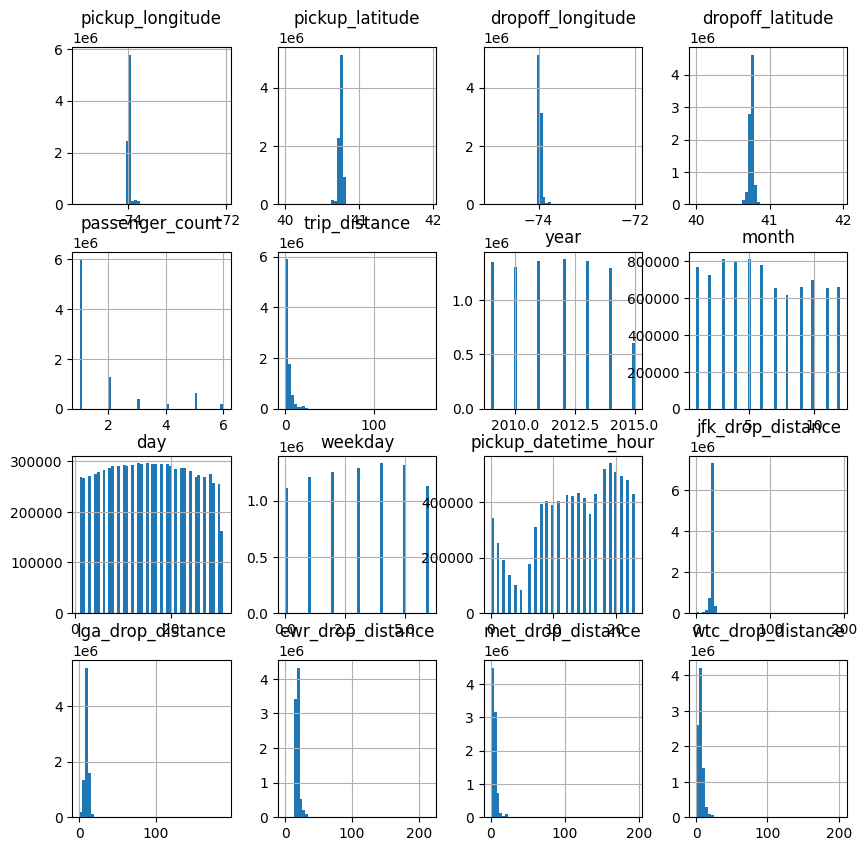

In [ ]:
train_inputs.hist(bins=50, figsize=(10, 10))

In [ ]:
skewed_features=['pickup_latitude','dropoff_latitude','trip_distance','wtc_drop_distance','met_drop_distance','ewr_drop_distance','lga_drop_distance','jfk_drop_distance']

log_numerical_features=[]

for f in skewed_features:
    train_inputs[f + '_log']=np.log1p(df[f])
    log_numerical_features.append(f + '_log')

In [ ]:
skewed_features=['pickup_latitude','dropoff_latitude','trip_distance','wtc_drop_distance','met_drop_distance','ewr_drop_distance','lga_drop_distance','jfk_drop_distance']

log_numerical_features=[]

for f in skewed_features:
    test_inputs[f + '_log']=np.log1p(df[f])
    log_numerical_features.append(f + '_log')

<ipython-input-111-ef3fce6e5b46>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs[f + '_log']=np.log1p(df[f])


In [ ]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,pickup_latitude_log,dropoff_latitude_log,trip_distance_log,wtc_drop_distance_log,met_drop_distance_log,ewr_drop_distance_log,lga_drop_distance_log,jfk_drop_distance_log
0,-73.973320,40.763805,-73.981430,40.743835,1,2.321801,2015,1,27,1,13,20.575100,9.760528,17.346430,4.239535,4.218555,3.730772,3.732466,2.245425,2.211813,0.868218,3.014966,2.290121,3.180411
1,-73.986862,40.719383,-73.998886,40.739201,1,2.423830,2015,1,27,1,13,21.550998,11.316227,15.789340,5.383154,3.098099,3.731296,3.731893,1.334409,1.838276,1.473072,2.900790,2.408135,3.143219
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618239,2011,10,8,5,11,20.594142,9.527242,17.576509,3.947070,4.514211,3.731739,3.732055,0.937976,2.021959,1.046365,2.988802,2.251811,3.111466
3,-73.981160,40.767807,-73.990448,40.751635,1,1.959801,2012,12,1,5,21,21.688980,10.195210,16.969447,3.844341,4.636731,3.731142,3.731259,0.811947,1.265598,1.927793,2.832208,2.502710,3.077783
4,-73.966046,40.789775,-73.988565,40.744427,1,5.383919,2012,12,1,5,21,21.113839,10.296122,16.808058,4.434183,3.966961,3.731391,3.731306,0.864425,1.478342,1.841078,2.892645,2.415315,3.040484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,2.123540,2015,5,10,6,12,21.506942,6.881012,21.014757,0.645327,8.809682,3.731714,3.730971,1.859487,1.880983,2.057895,3.028154,2.272895,2.862496
9910,-73.945511,40.803600,-73.960213,40.776371,6,3.268915,2015,1,12,0,17,21.462191,7.255103,20.464293,0.420106,8.229148,3.731160,3.732358,1.973601,2.268759,0.640230,3.094347,2.032655,3.096192
9911,-73.991600,40.726608,-73.789742,40.647011,6,19.171897,2015,4,19,6,20,1.168871,16.084488,32.772369,20.734152,19.933770,3.730923,3.731001,0.558704,0.872855,2.093996,2.792313,2.573744,3.067427
9912,-73.985573,40.735432,-73.939178,40.801731,6,8.338248,2015,1,31,5,1,22.402544,6.138877,23.410408,3.200397,11.556017,3.731133,3.730580,1.597308,0.721677,2.344065,2.689723,2.724541,3.087838


In [70]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

In [71]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv('/content/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model1 = Ridge(random_state=42)

In [ ]:
%%time
model1.fit(train_inputs, train_targets)

CPU times: user 1.21 s, sys: 398 ms, total: 1.61 s
Wall time: 1.52 s


Ridge(random_state=42)

In [ ]:
evaluate(model1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(5.138775645942629,
 5.153842270633514,
 array([ 8.95164081,  6.64844871,  9.35542556, ...,  7.50305828,
        11.07984332,  5.78015877]),
 array([ 6.98292087,  6.52585069,  4.51259096, ...,  7.96076039,
         9.4458365 , 30.49024131]))

In [ ]:
predict_and_submit(model1, 'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.134909
1,2015-01-27 13:08:24.0000003,11.472850
2,2011-10-08 11:53:44.0000002,5.450960
3,2012-12-01 21:12:12.0000002,8.700471
4,2012-12-01 21:12:12.0000003,14.347387
...,...,...
9909,2015-05-10 12:37:51.0000002,8.979793
9910,2015-01-12 17:05:51.0000001,11.182933
9911,2015-04-19 20:44:15.0000001,47.576220
9912,2015-01-31 01:05:19.0000005,22.398509


In [ ]:
predict_and_submit(linreg_model, 'Linear_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.134828
1,2015-01-27 13:08:24.0000003,11.473162
2,2011-10-08 11:53:44.0000002,5.450974
3,2012-12-01 21:12:12.0000002,8.700444
4,2012-12-01 21:12:12.0000003,14.347096
...,...,...
9909,2015-05-10 12:37:51.0000002,8.979316
9910,2015-01-12 17:05:51.0000001,11.182445
9911,2015-04-19 20:44:15.0000001,47.576924
9912,2015-01-31 01:05:19.0000005,22.398628


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=7, n_estimators=50)
model2.fit(train_inputs, train_targets)

In [ ]:
evaluate(model2)

In [ ]:
predict_and_submit(model2, 'rf_submission.csv')

In [64]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 23.0 MB/s eta 0:00:00


In [63]:
train_targets

,fare_amount
7997646,9.296875
5161690,4.898438
5060892,8.500000
1752887,4.898438
8156641,8.000000
...,...
2290784,8.101562
4412694,8.000000
10334578,6.898438
6715540,11.703125


In [67]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool

In [68]:
%%time

model3 = CatBoostRegressor(iterations=1500,
                           depth=8,
                           learning_rate = 0.04,
                          #  od_wait=500,
                           task_type='GPU'
                           )
model3.fit(train_inputs, train_targets)

0:	learn: 9.3900562	total: 67.8ms	remaining: 1m 41s
1:	learn: 9.1101376	total: 127ms	remaining: 1m 35s
2:	learn: 8.8437156	total: 186ms	remaining: 1m 32s
3:	learn: 8.5907718	total: 244ms	remaining: 1m 31s
4:	learn: 8.3506820	total: 303ms	remaining: 1m 30s
5:	learn: 8.1198863	total: 363ms	remaining: 1m 30s
6:	learn: 7.9018979	total: 421ms	remaining: 1m 29s
7:	learn: 7.6946054	total: 480ms	remaining: 1m 29s
8:	learn: 7.4980342	total: 539ms	remaining: 1m 29s
9:	learn: 7.3095611	total: 598ms	remaining: 1m 29s
10:	learn: 7.1291583	total: 657ms	remaining: 1m 28s
11:	learn: 6.9618301	total: 715ms	remaining: 1m 28s
12:	learn: 6.8022368	total: 773ms	remaining: 1m 28s
13:	learn: 6.6511197	total: 830ms	remaining: 1m 28s
14:	learn: 6.5082764	total: 890ms	remaining: 1m 28s
15:	learn: 6.3731202	total: 947ms	remaining: 1m 27s
16:	learn: 6.2432430	total: 1.01s	remaining: 1m 27s
17:	learn: 6.1182519	total: 1.07s	remaining: 1m 27s
18:	learn: 6.0016291	total: 1.12s	remaining: 1m 27s
19:	learn: 5.8935456	

KeyboardInterrupt: 

Exception ignored in: '_catboost._WriteLog'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 384, in write
    def write(self, string):
KeyboardInterrupt: 


74:	learn: 4.1445498	total: 4.48s	remaining: 1m 25s
75:	learn: 4.1391547	total: 4.54s	remaining: 1m 25s
76:	learn: 4.1322634	total: 4.6s	remaining: 1m 25s
77:	learn: 4.1278679	total: 4.66s	remaining: 1m 25s
78:	learn: 4.1228399	total: 4.72s	remaining: 1m 24s
79:	learn: 4.1179100	total: 4.79s	remaining: 1m 24s
80:	learn: 4.1128094	total: 4.85s	remaining: 1m 24s
81:	learn: 4.1089277	total: 4.91s	remaining: 1m 24s
82:	learn: 4.1042744	total: 4.98s	remaining: 1m 24s
83:	learn: 4.1002067	total: 5.03s	remaining: 1m 24s
84:	learn: 4.0967578	total: 5.1s	remaining: 1m 24s
85:	learn: 4.0936223	total: 5.16s	remaining: 1m 24s
86:	learn: 4.0889887	total: 5.22s	remaining: 1m 24s
87:	learn: 4.0846679	total: 5.28s	remaining: 1m 24s
88:	learn: 4.0802887	total: 5.34s	remaining: 1m 24s
89:	learn: 4.0770977	total: 5.41s	remaining: 1m 24s
90:	learn: 4.0720004	total: 5.46s	remaining: 1m 24s
91:	learn: 4.0689276	total: 5.52s	remaining: 1m 24s
92:	learn: 4.0643098	total: 5.58s	remaining: 1m 24s
93:	learn: 4.0

In [ ]:
evaluate(model3)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CatBoostError: catboost/libs/data/model_dataset_compatibility.cpp:72: Feature pickup_latitude_log is present in model but not in pool.

In [72]:
predict_and_submit(model3, 'cat_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.481899
1,2015-01-27 13:08:24.0000003,11.297802
2,2011-10-08 11:53:44.0000002,4.719764
3,2012-12-01 21:12:12.0000002,8.838695
4,2012-12-01 21:12:12.0000003,15.968354
...,...,...
9909,2015-05-10 12:37:51.0000002,8.747960
9910,2015-01-12 17:05:51.0000001,11.505973
9911,2015-04-19 20:44:15.0000001,53.324939
9912,2015-01-31 01:05:19.0000005,20.536923


In [84]:
val_targets

,fare_amount
4626295,6.101562
5454962,6.500000
3349490,7.300781
9612151,7.300781
215460,5.699219
...,...
10888381,5.699219
9739376,17.000000
2998411,10.000000
8846908,10.500000


In [89]:
import lightgbm as lgb
model = lgb.LGBMRegressor(learning_rate=0.03, max_depth=-1,boosting='gbdt',reg_sqrt = True,max_bin = 5000,early_stopping_round = 50,num_rounds = 5000,num_leaves = 1200,metric='rmse', random_state=42)
model.fit(train_inputs, train_targets,eval_set=[(val_inputs, val_targets)])


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=5000, num_rounds=5000 will be ignored. Current value: num_iterations=5000
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.521063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50091
[LightGBM] [Info] Number of data points in the train set: 8646304, number of used features: 16
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=5000, num_rounds=5000 will be ignored. Current value: num_iterations=5000
[LightGBM] [Info] Start training from score 3.178098
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[

LGBMRegressor(boosting='gbdt', early_stopping_round=50, learning_rate=0.03,
              max_bin=5000, metric='rmse', num_leaves=1200, num_rounds=5000,
              random_state=42, reg_sqrt=True)

In [90]:
predict_and_submit(model, 'light2.csv')

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.198147
1,2015-01-27 13:08:24.0000003,10.314170
2,2011-10-08 11:53:44.0000002,4.278409
3,2012-12-01 21:12:12.0000002,9.663127
4,2012-12-01 21:12:12.0000003,16.574101
...,...,...
9909,2015-05-10 12:37:51.0000002,9.178748
9910,2015-01-12 17:05:51.0000001,11.009081
9911,2015-04-19 20:44:15.0000001,53.036468
9912,2015-01-31 01:05:19.0000005,18.638440
